# Face Recognition with OpenCV and Python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Introduction

What is face recognition? Or what is recognition? When you look at an apple fruit, your mind immediately tells you that this is an apple fruit. This process, your mind telling you that this is an apple fruit is recognition in simple words. So what is face recognition then? I am sure you have guessed it right. When you look at your friend walking down the street or a picture of him, you recognize that he is your friend Paulo. Interestingly when you look at your friend or a picture of him you look at his face first before looking at anything else. Ever wondered why you do that? This is so that you can recognize him by looking at his face. Well, this is you doing face recognition. 

But the real question is how does face recognition works? It is quite simple and intuitive. Take a real life example, when you meet someone first time in your life you don't recognize him, right? While he talks or shakes hands with you, you look at his face, eyes, nose, mouth, color and overall look. This is your mind learning or training for the face recognition of that person by gathering face data. Then he tells you that his name is Paulo. At this point your mind knows that the face data it just learned belongs to Paulo. Now your mind is trained and ready to do face recognition on Paulo's face. Next time when you will see Paulo or his face in a picture you will immediately recognize him. This is how face recognition work. The more you will meet Paulo, the more data your mind will collect about Paulo and especially his face and the better you will become at recognizing him. 

Now the next question is how to code face recognition with OpenCV, after all this is the only reason why you are reading this article, right? OK then. You might say that our mind can do these things easily but to actually code them into a computer is difficult? Don't worry, it is not. Thanks to OpenCV, coding face recognition is as easier as it feels. The coding steps for face recognition are same as we discussed it in real life example above.

- **Training Data Gathering:** Gather face data (face images in this case) of the persons you want to recognize
- **Training of Recognizer:** Feed that face data (and respective names of each face) to the face recognizer so that it can learn.
- **Recognition:** Feed new faces of the persons and see if the face recognizer you just trained recognizes them.

OpenCV comes equipped with built in face recognizer, all you have to do is feed it the face data. It's that simple and this how it will look once we are done coding it.

![visualization](output/output.png)

## OpenCV Face Recognizers

OpenCV has three built in face recognizers and thanks to OpenCV's clean coding, you can use any of them by just changing a single line of code. Below are the names of those face recognizers and their OpenCV calls. 

1. EigenFaces Face Recognizer Recognizer - `cv2.face.createEigenFaceRecognizer()`
2. FisherFaces Face Recognizer Recognizer - `cv2.face.createFisherFaceRecognizer()`
3. Local Binary Patterns Histograms (LBPH) Face Recognizer - `cv2.face.createLBPHFaceRecognizer()`

We have got three face recognizers but do you know which one to use and when? Or which one is better? I guess not. So why not go through a brief summary of each, what you say? I am assuming you said yes :) So let's dive into the theory of each. 

### EigenFaces Face Recognizer

This algorithm considers the fact that not all parts of a face are equally important and equally useful. When you look at some one you recognize him/her by his distinct features like eyes, nose, cheeks, forehead and how they vary with respect to each other. So you are actually focusing on the areas of maximum change (mathematically speaking, this change is variance) of the face. For example, from eyes to nose there is a significant change and same is the case from nose to mouth. When you look at multiple faces you compare them by looking at these parts of the faces because these parts are the most useful and important components of a face. Important because they catch the maximum change among faces, change that helps you differentiate one face from the other. This is exactly how EigenFaces face recognizer works.  

EigenFaces face recognizer looks at all the training images of all the persons as a whole and try to extract the components which are important and useful (the components that catch the maximum variance/change) and discards the rest of the components. This way it not only extracts the important components from the training data but also saves memory by discarding the less important components. These important components it extracts are called **principal components**. 

I will use the terms **principal components**, **variance**, **areas of high change**, **useful features** interchangably a they basically are same thing.


Below is an image showing the principal components extracted from a list of faces.

**Principal Components**

![eigenfaces_opencv](visualization/eigenfaces_opencv.png)

**[source](http://docs.opencv.org/2.4/modules/contrib/doc/facerec/facerec_tutorial.html)**

You can see that principal components actually represent faces and these faces are called **eigen faces** and hence the name of the algorithm. 

So this is how EigenFaces face recognizer trains itself (by extracting principal components). Remember, it also keeps a record of which principal component belongs to which person. One thing to note in above image is that **Eigenfaces algorithm also considers illumination as an important component**. 

Later during recognition, when you feed a new image to the algorithm, it repeats the same process on that image as well. It extracts the principal component from that new image and compares that component with the list of components it stored during training and finds the component with the best match and returns the person label associated with that best match component. 

Easy peasy, right? Next one is even easier than this one. 

### FisherFaces Face Recognizer 

This algorithm is an improved version of EigenFaces face recognizer. Eigenfaces face recognizer looks at all the training faces of all the persons at once and finds principal components from all of them combined. By capturing principal components from all of faces combined you are not focusing on the features that discriminate one person from the other but the features that represent all the faces of all the persons in the training data as a whole.

This approach has a drawback. For example, consider the illumination changes in following faces.

![Illumination changes](visualization/illumination-changes.png)

You know that the EigenFaces face recognizer also considers illumination as an important component, right? So imagine a scenario in which all the faces of one person has very high illuminiation changes (really dark or really light etc.). EigenFaces face recognizer will consider those illumination changes very useful features and may discard the features of the other persons' faces considering them less useful. Now the features EigenFaces has extracted represent just one person's facial features and not all the persons' facial features. 

How to fix this? We can fix this by tunning EigenFaces face recognizer so that it extracts useful features from faces of each person separately instead of extracting useful features of all the faces combined. This way, even if one person has high illumination changes it will not affect the other persons features extraction process. This is exactly what FisherFaces face recognizer algorithm does. 

Fisherfaces algorithm, instead of extracting useful features that represent all the faces of all the persons, it extracts useful features that discriminate one person from the others. This way features of one person do not dominate (considered more useful features) over the others and you have the features that discriminate one person from the others. 

Below is an image of features extracted using Fisherfaces algorithm.

**Fisher Faces**

![eigenfaces_opencv](visualization/fisherfaces_opencv.png)

**[source](http://docs.opencv.org/2.4/modules/contrib/doc/facerec/facerec_tutorial.html)**

You can see that features extracted actually represent faces and these faces are called **fisher faces** and hence the name of the algorithm. 

One thing to note here is that Fisherfaces face recognizer only prevents features of one person from dominating over features of the other persons but it still considers illumination changes as useful features. We know that illumination change is not a useful feature to extract as it is not part of the actual face. Then, wow to get rid of this illumination problem? This is where our next face recognizer comes in.

### Local Binary Patterns Histograms (LBPH) Face Recognizer 

I wrote a detailed explaination on Local Binary Patterns Histograms in my previous article on [face detection](https://www.superdatascience.com/opencv-face-detection/) using local binary patterns histograms. So here I will just give a brief overview of how it works.

We know that Eigenfaces and Fisherfaces are both affected by light and in real life we can't guarantee perfect light conditions. LBPH face recognizer is an improvement to overcome this drawback.

Idea is to not look at the image as a whole instead find the local features of an image. LBPH alogrithm try to find the local structure of an image and it does that by comparing each pixel with its neighboring pixels. 

Take a 3x3 window and move it one image, at each move (each local part of an image), compare the pixel at the center with its neighbor pixels. The neighbors with intensity value less than or equal to center pixel are denoted by 1 and others by 0. Then you read these 0/1 values under 3x3 window in a clockwise order and you will have a binary pattern like 11100011 and this pattern is local to a specific area of the image. You do this on whole image and you will have a list of local binary patterns. 


**LBP Labeling**

![LBP labeling](visualization/lbp-labeling.png)

Now you get why this algorithm has Local Binary Patterns in its name? Because you get a list of local binary patterns. Now you may be wondering, what about the histogram part of the LBPH? Well after you get a list of local binary patterns, you convert each binary pattern into a decimal number using [binary to decimal conversion](https://www.mathsisfun.com/binary-number-system.html) (as shown in above image) and then you make a [histogram](https://www.mathsisfun.com/data/histograms.html) of all of those decimal values. A sample histogram looks like this. 


**Sample Histogram**

![LBP labeling](visualization/histogram.png)



I guess this answers the question about histogram part. So in the end you will have **one histogram for each face** image in the training data set. That means if there were 100 images in training data set then LBPH will extract 100 histograms after training and store them for later recognition. Remember, **algorithm also keeps track of which histogram belongs to which person**.

Later during recognition, when you will feed a new image to the recognizer for recognition it will generate a histogram for that new image, compare that histogram with the histograms it already has, find the best match histogram and return the person label associated with that best match histogram. 

Below is a list of faces and their respective local binary patterns images. You can see that the LBP images are not affected by changes in light conditions.


**LBP Faces**

![LBP faces](visualization/lbph-faces.jpg)

**[source](http://docs.opencv.org/2.4/modules/contrib/doc/facerec/facerec_tutorial.html)**


The theory part is over and now comes the coding part! Ready to dive into coding? Let's get into it then. 

# Coding Face Recognition with OpenCV

The Face Recognition process in this tutorial is divided into three steps.

1. **Prepare training data:** In this step we will read training images for each person/subject along with their labels, detect faces from each image and assign each detected face an integer label of the person it belongs to.
2. **Train Face Recognizer:** In this step we will train OpenCV's LBPH face recognizer by feeding it the data we prepared in step 1.
3. **Testing:** In this step we will pass some test images to face recognizer and see if it predicts them correctly.

To detect faces, I will use the code from my previous article on [face detection](https://www.superdatascience.com/opencv-face-detection/). So if you have not read it, I encourage you to do so to understand how face detection works and its Python coding. 

### Code Dependencies

1. [OpenCV 3.2.0](http://opencv.org/releases.html).
2. [Python v3.5](https://www.python.org/downloads/).
3. [NumPy](http://www.numpy.org/) Numpy makes computing in Python easy. Amont other things it contains a powerful implementation of N-dimensional arrays which we will use for feeding data as input to OpenCV functions.

### Import Required Modules

Before starting the actual coding we need to import the required modules for coding. So let's import them first. 

- **cv2:** is _OpenCV_ module for Python which we will use for face detection and face recognition.
- **os:** We will use this Python module to read our training directories and file names.
- **numpy:** We will use this module to convert Python lists to numpy arrays as OpenCV face recognizers accept numpy arrays.

In [ ]:
#import OpenCV module
import cv2
#import os module for reading training data directories and paths
import os
#import numpy to convert python lists to numpy arrays as 
#it is needed by OpenCV face recognizers
import numpy as np

### Training Data

The more images used in training the better. Normally a lot of images are used for training a face recognizer so that it can learn different looks of the same person, for example with glasses, without glasses, laughing, sad, happy, crying, with beard, without beard etc. To keep our tutorial simple we are going to use only 12 images for each person. 

So our training data consists of total 2 persons with 12 images of each person. All training data is inside _`training-data`_ folder. _`training-data`_ folder contains one folder for each person and **each folder is named with format `sLabel (e.g. s1, s2)` where label is actually the integer label assigned to that person**. For example folder named s1 means that this folder contains images for person 1. The directory structure tree for training data is as follows:

```
training-data
|-------------- s1
|               |-- 1.jpg
|               |-- ...
|               |-- 12.jpg
|-------------- s2
|               |-- 1.jpg
|               |-- ...
|               |-- 12.jpg
```

The _`test-data`_ folder contains images that we will use to test our face recognizer after it has been successfully trained.

As OpenCV face recognizer accepts labels as integers so we need to define a mapping between integer labels and persons actual names so below I am defining a mapping of persons integer labels and their respective names. 

**Note:** As we have not assigned `label 0` to any person so **the mapping for label 0 is empty**. 

In [ ]:
#there is no label 0 in our training data so subject name for index/label 0 is empty
subjects = ["", "Ramiz Raja", "Elvis Presley"]

### Prepare training data

You may be wondering why data preparation, right? Well, OpenCV face recognizer accepts data in a specific format. It accepts two vectors, one vector is of faces of all the persons and the second vector is of integer labels for each face so that when processing a face the face recognizer knows which person that particular face belongs too. 

For example, if we had 2 persons and 2 images for each person. 

```
PERSON-1    PERSON-2   

img1        img1         
img2        img2
```

Then the prepare data step will produce following face and label vectors.

```
FACES                        LABELS

person1_img1_face              1
person1_img2_face              1
person2_img1_face              2
person2_img2_face              2
```


Preparing data step can be further divided into following sub-steps.

1. Read all the folder names of subjects/persons provided in training data folder. So for example, in this tutorial we have folder names: `s1, s2`. 
2. For each subject, extract label number. **Do you remember that our folders have a special naming convention?** Folder names follow the format `sLabel` where `Label` is an integer representing the label we have assigned to that subject. So for example, folder name `s1` means that the subject has label 1, s2 means subject label is 2 and so on. The label extracted in this step is assigned to each face detected in the next step. 
3. Read all the images of the subject, detect face from each image.
4. Add each face to faces vector with corresponding subject label (extracted in above step) added to labels vector. 

Did you read my last article on [face detection](https://www.superdatascience.com/opencv-face-detection/)? No? Then you better do so right now because to detect faces, I am going to use the code from my previous article on [face detection](https://www.superdatascience.com/opencv-face-detection/). So if you have not read it, I encourage you to do so to understand how face detection works and its coding. Below is the same code.

In [ ]:
#function to detect face using OpenCV
def detect_face(img):
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #load OpenCV face detector, I am using LBP which is fast
    #there is also a more accurate but slow Haar classifier
    face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/opencv-face-recognition-python-master/opencv-files/lbpcascade_frontalface.xml')

    #let's detect multiscale (some images may be closer to camera than others) images
    #result is a list of faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5);
    
    #if no faces are detected then return original img
    if (len(faces) == 0):
        return None, None
    
    #under the assumption that there will be only one face,
    #extract the face area
    (x, y, w, h) = faces[0]
    
    #return only the face part of the image
    return gray[y:y+w, x:x+h], faces[0]

I am using OpenCV's **LBP face detector**. On _line 4_, I convert the image to grayscale because most operations in OpenCV are performed in gray scale, then on _line 8_ I load LBP face detector using `cv2.CascadeClassifier` class. After that on _line 12_ I use `cv2.CascadeClassifier` class' `detectMultiScale` method to detect all the faces in the image. on _line 20_, from detected faces I only pick the first face because in one image there will be only one face (under the assumption that there will be only one prominent face). As faces returned by `detectMultiScale` method are actually rectangles (x, y, width, height) and not actual faces images so we have to extract face image area from the main image. So on _line 23_ I extract face area from gray image and return both the face image area and face rectangle.

Now you have got a face detector and you know the 4 steps to prepare the data, so are you ready to code the prepare data step? Yes? So let's do it. 

In [ ]:
#this function will read all persons' training images, detect face from each image
#and will return two lists of exactly same size, one list 
# of faces and another list of labels for each face
def prepare_training_data(data_folder_path):
    
    #------STEP-1--------
    #get the directories (one directory for each subject) in data folder
    dirs = os.listdir(data_folder_path)
    
    #list to hold all subject faces
    faces = []
    #list to hold labels for all subjects
    labels = []
    
    #let's go through each directory and read images within it
    for dir_name in dirs:
        
        #our subject directories start with letter 's' so
        #ignore any non-relevant directories if any
        if not dir_name.startswith("s"):
            continue;
            
        #------STEP-2--------
        #extract label number of subject from dir_name
        #format of dir name = slabel
        #, so removing letter 's' from dir_name will give us label
        label = int(dir_name.replace("s", ""))
        
        #build path of directory containin images for current subject subject
        #sample subject_dir_path = "training-data/s1"
        subject_dir_path = data_folder_path + "/" + dir_name
        
        #get the images names that are inside the given subject directory
        subject_images_names = os.listdir(subject_dir_path)
        
        #------STEP-3--------
        #go through each image name, read image, 
        #detect face and add face to list of faces
        for image_name in subject_images_names:
            
            #ignore system files like .DS_Store
            if image_name.startswith("."):
                continue;
            
            #build image path
            #sample image path = training-data/s1/1.pgm
            image_path = subject_dir_path + "/" + image_name

            #read image
            image = cv2.imread(image_path)
            
            #display an image window to show the image 
            cv2_imshow(image)
            cv2.waitKey(100)
            
            #detect face
            face, rect = detect_face(image)
            
            #------STEP-4--------
            #for the purpose of this tutorial
            #we will ignore faces that are not detected
            if face is not None:
                #add face to list of faces
                faces.append(face)
                #add label for this face
                labels.append(label)
            
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    
    return faces, labels

I have defined a function that takes the path, where training subjects' folders are stored, as parameter. This function follows the same 4 prepare data substeps mentioned above. 

**(step-1)** On _line 8_ I am using `os.listdir` method to read names of all folders stored on path passed to function as parameter. On _line 10-13_ I am defining labels and faces vectors. 

**(step-2)** After that I traverse through all subjects' folder names and from each subject's folder name on _line 27_ I am extracting the label information. As folder names follow the `sLabel` naming convention so removing the  letter `s` from folder name will give us the label assigned to that subject. 

**(step-3)** On _line 34_, I read all the images names of of the current subject being traversed and on _line 39-66_ I traverse those images one by one. On _line 53-54_ I am using OpenCV's `imshow(window_title, image)` along with OpenCV's `waitKey(interval)` method to display the current image being traveresed. The `waitKey(interval)` method pauses the code flow for the given interval (milliseconds), I am using it with 100ms interval so that we can view the image window for 100ms. On _line 57_, I detect face from the current image being traversed. 

**(step-4)** On _line 62-66_, I add the detected face and label to their respective vectors.

But a function can't do anything unless we call it on some data that it has to prepare, right? Don't worry, I have got data for two faces. I am sure you will recognize at least one of them!

![training-data](visualization/test-images.png)

Let's call this function on images of these beautiful celebrities to prepare data for training of our Face Recognizer. Below is a simple code to do that.

In [ ]:
#let's first prepare our training data
#data will be in two lists of same size
#one list will contain all the faces
#and other list will contain respective labels for each face
print("Preparing data...")
faces, labels = prepare_training_data("/content/drive/My Drive/opencv-face-recognition-python-master/training-data")
print("Data prepared")

#print total faces and labels
print("Total faces: ", len(faces))
print("Total labels: ", len(labels))

In [ ]:
from google.colab.patches import cv2_imshow

This was probably the boring part, right? Don't worry, the fun stuff is coming up next. It's time to train our own face recognizer so that once trained it can recognize new faces of the persons it was trained on. Read? Ok then let's train our face recognizer. 

### Train Face Recognizer

As we know, OpenCV comes equipped with three face recognizers.

1. EigenFace Recognizer: This can be created with `cv2.face.createEigenFaceRecognizer()`
2. FisherFace Recognizer: This can be created with `cv2.face.createFisherFaceRecognizer()`
3. Local Binary Patterns Histogram (LBPH): This can be created with `cv2.face.LBPHFisherFaceRecognizer()`

I am going to use LBPH face recognizer but you can use any face recognizer of your choice. No matter which of the OpenCV's face recognizer you use the code will remain the same. You just have to change one line, the face recognizer initialization line given below. 

In [ ]:
#create our LBPH face recognizer 
face_recognizer = cv2.face.LBPHFaceRecognizer_create()

#or use EigenFaceRecognizer by replacing above line with 
#face_recognizer = cv2.face.createEigenFaceRecognizer()

#or use FisherFaceRecognizer by replacing above line with 
#face_recognizer = cv2.face.createFisherFaceRecognizer()

Now that we have initialized our face recognizer and we also have prepared our training data, it's time to train the face recognizer. We will do that by calling the `train(faces-vector, labels-vector)` method of face recognizer. 

In [ ]:
#train our face recognizer of our training faces
face_recognizer.train(faces, np.array(labels))

**Did you notice** that instead of passing `labels` vector directly to face recognizer I am first converting it to **numpy** array? This is because OpenCV expects labels vector to be a `numpy` array. 

Still not satisfied? Want to see some action? Next step is the real action, I promise! 

### Prediction

Now comes my favorite part, the prediction part. This is where we actually get to see if our algorithm is actually recognizing our trained subjects's faces or not. We will take two test images of our celeberities, detect faces from each of them and then pass those faces to our trained face recognizer to see if it recognizes them. 

Below are some utility functions that we will use for drawing bounding box (rectangle) around face and putting celeberity name near the face bounding box. 

In [ ]:
#function to draw rectangle on image 
#according to given (x, y) coordinates and 
#given width and heigh
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
#function to draw text on give image starting from
#passed (x, y) coordinates. 
def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

First function `draw_rectangle` draws a rectangle on image based on passed rectangle coordinates. It uses OpenCV's built in function `cv2.rectangle(img, topLeftPoint, bottomRightPoint, rgbColor, lineWidth)` to draw rectangle. We will use it to draw a rectangle around the face detected in test image.

Second function `draw_text` uses OpenCV's built in function `cv2.putText(img, text, startPoint, font, fontSize, rgbColor, lineWidth)` to draw text on image. 

Now that we have the drawing functions, we just need to call the face recognizer's `predict(face)` method to test our face recognizer on test images. Following function does the prediction for us.

In [ ]:
#this function recognizes the person in image passed
#and draws a rectangle around detected face with name of the 
#subject
def predict(test_img):
    #make a copy of the image as we don't want to chang original image
    img = test_img.copy()
    #detect face from the image
    face, rect = detect_face(img)

    #predict the image using our face recognizer 
    label= face_recognizer.predict(face)
    label, confidence = face_recognizer.predict(face)
    #get name of respective label returned by face recognizer
    label_text = subjects[label]
    
    #draw a rectangle around face detected
    draw_rectangle(img, rect)
    #draw name of predicted person
    draw_text(img, label_text, rect[0], rect[1]-5)
    
    return img

* **line-6** read the test image
* **line-7** detect face from test image
* **line-11** recognize the face by calling face recognizer's `predict(face)` method. This method will return a lable
* **line-12** get the name associated with the label
* **line-16** draw rectangle around the detected face
* **line-18** draw name of predicted subject above face rectangle

Now that we have the prediction function well defined, next step is to actually call this function on our test images and display those test images to see if our face recognizer correctly recognized them. So let's do it. This is what we have been waiting for. 

In [ ]:
import numpy as np

Predicting images...
Prediction complete


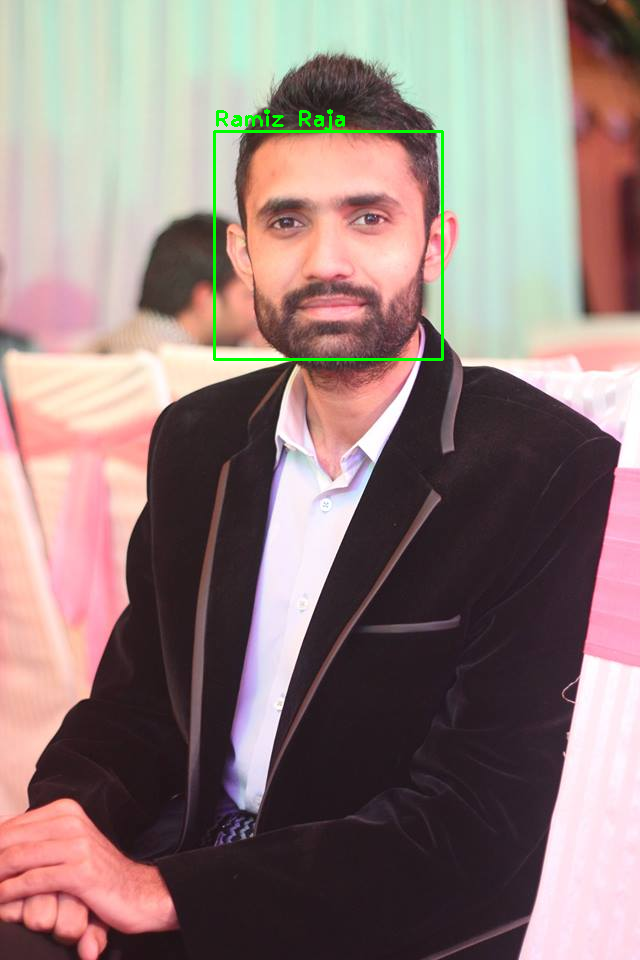

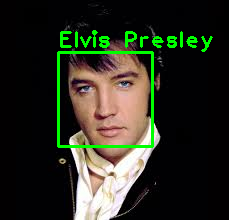

In [ ]:
print("Predicting images...")

#load test images
test_img1 = cv2.imread("/content/drive/My Drive/opencv-face-recognition-python-master/test-data/test1.jpg")
test_img2 = cv2.imread("/content/drive/My Drive/opencv-face-recognition-python-master/test-data/test2.jpg")

#test1_img1 = np.array(test_img1)
#test1_img2 = np.array(test_img2)
#perform a prediction
predicted_img1 = predict(test_img1)
predicted_img2 = predict(test_img2)
print("Prediction complete")

#pred_img1 = np.array(predicted_img1)
#pred_img2 = np.array(predicted_img2)

#display both images
cv2_imshow(predicted_img1)
cv2_imshow(predicted_img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

wohooo! Is'nt it beautiful? Indeed, it is! 

## End Notes

You can download the complete code and relevant files from this Github [repo](https://github.com/informramiz/opencv-face-recognition-python).

Face Recognition is a fascinating idea to work on and OpenCV has made it extremely simple and easy for us to code it. It takes just a few lines of code to have a fully working face recognition application and we can switch between all three face recognizers with a single line of code change. It's that simple. 

Although EigenFaces, FisherFaces and LBPH face recognizers are good but there are even better ways to perform face recognition like using Histogram of Oriented Gradients (HOGs) and Neural Networks. So the more advanced face recognition algorithms are now a days implemented using a combination of OpenCV and Machine learning. I have plans to write some articles on those more advanced methods as well, so stay tuned! 